按照数据大小进行过滤

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [165]:
linelevel_pre_false = pd.read_json('linelevel_pre_false.json')
linelevel_pre_true = pd.read_json('linelevel_pre_true.json')

linelevel_attribution_false = pd.read_json('linelevel_attribution_false.json')
linelevel_attribution_true = pd.read_json('linelevel_attribution_true.json')
linelevel_attribution_false['value'] = linelevel_attribution_false['value'] * 10
linelevel_attribution_true['value'] = linelevel_attribution_true['value'] * 10

In [166]:
len(linelevel_pre_false),len(linelevel_attribution_false)

(965, 6079)

In [167]:
len(linelevel_pre_true),len(linelevel_attribution_true)

(2174, 14274)

true

In [168]:
count_greater_than_1 = (linelevel_attribution_true['value'] > 1).sum().sum()
count_greater_than_2 = (linelevel_attribution_true['value'] > 2).sum().sum()
count_greater_than_4 = (linelevel_attribution_true['value'] > 4).sum().sum()
count_greater_than_5 = (linelevel_attribution_true['value'] > 5).sum().sum()
count_greater_than_1,count_greater_than_2,count_greater_than_4,count_greater_than_5

(142, 20, 1, 1)

In [169]:
count_less_than_1 = (linelevel_attribution_true['value'] < -1).sum().sum()
count_less_than_2 = (linelevel_attribution_true['value'] < -2).sum().sum()
count_less_than_4 = (linelevel_attribution_true['value'] < -4).sum().sum()
count_less_than_5 = (linelevel_attribution_true['value'] < -5).sum().sum()
count_less_than_1,count_less_than_2,count_less_than_4,count_less_than_5

(129, 18, 2, 0)

In [170]:
# 删除了 大于2小于-2 的值
attribution_true_copy1 = linelevel_attribution_true.copy()
attribution_true_copy1 = attribution_true_copy1[attribution_true_copy1['value'] <= 2]
attribution_true_copy1 = attribution_true_copy1[attribution_true_copy1['value'] > -2]
attribution_true_copy1 = attribution_true_copy1.reset_index(drop=True)

In [171]:
def get_list_print_df(df, name):
    col_list = []
    for i in range(len(df)):
        if df.loc[i]['key'] == name:
            attr = df.loc[i]['value']
            col_list.append(attr)
    df = pd.DataFrame(col_list, columns=[name])
    return df

In [172]:
def get_all_colunm_df(df):
    unique_values = df['key'].value_counts().index
    result = pd.DataFrame()

    for uniq in unique_values:
        attr = get_list_print_df(df, uniq)
        result = pd.concat([result, attr], axis=1)
        
    # 删除列名称中的 '_num' 字符串
    df.rename(columns=lambda x: x.replace('_num', ''), inplace=True)
    return result 

In [173]:
all_colunm_df_true = get_all_colunm_df(attribution_true_copy1)
all_colunm_df_true.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.191197            -0.026822               0.013571   
1        0.048397             0.131420               0.412345   
2        0.034493             0.166484               0.211686   
3       -0.050494             0.035449               0.023537   
4        0.023919             0.232338              -0.060836   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         0.224068                 0.191197          0.131420   
1         0.267434                 0.048397          0.222676   
2         0.034493                 0.266712         -0.007340   
3         0.136808                 0.166484          0.007644   
4        -0.031834                -0.050494         -0.140988   

   trystatement_num  whilestatement_num  
0         -0.087215           -0.135945  
1          0.005061            0.487758  
2          0.145905            0.199363  
3         -0.041888           -0.011297  
4         -0.003133            0.038573

In [174]:
mean_value = all_colunm_df_true.mean()
mean_value 

expression_num             0.014970
returnstatement_num        0.023891
MethodDeclaration_num     -0.013036
ifstatement_num            0.008851
variableDeclaration_num    0.022000
forstatement_num          -0.010513
trystatement_num          -0.011785
whilestatement_num         0.012638
dtype: float64

In [175]:
std_value = all_colunm_df_true.std()
std_value

expression_num             0.191643
returnstatement_num        0.349901
MethodDeclaration_num      0.429026
ifstatement_num            0.179088
variableDeclaration_num    0.224807
forstatement_num           0.199029
trystatement_num           0.220961
whilestatement_num         0.160666
dtype: float64

In [176]:
# 画出和论文一样的图
def get_paper_picture(df):
    
    # 图形大小，随时改
    plt.figure(figsize=(40, 8))

    # 定义颜色
    palette = sns.color_palette('pastel')

    # 画图
    for i, col in enumerate(df.columns):
        # 小提琴
        sns.violinplot(x=np.full(len(df), i), y=df[col], inner=None, hue=np.full(len(df), i), palette=[palette[i]], legend=False)
        # 散点图
        sns.stripplot(x=np.full(len(df), i) - 0.5, y=df[col], color=palette[i], alpha=0.5, jitter=0.2, legend=False)
        # 箱线图
        sns.boxplot(x=np.full(len(df), i), y=df[col], width=0.2, showcaps=True, showfliers=False,  # 不显示异常值
                    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),  # 更改边框线条粗细
                    whiskerprops=dict(color='black', linewidth=2), 
                    capprops=dict(color='black', linewidth=2), 
                    medianprops=dict(color='#8B8B83', linewidth=2), 
                    flierprops=dict(marker='o', color='red', alpha=0.5))
    # 均值线
    mean_value = df.mean()
    print("均值 : ")
    print(mean_value)
    mean_value_sorted = mean_value.sort_values(ascending=False)
    print("\n从大到小排序后的均值 : ")
    print(mean_value_sorted)
    
    new_mean_value = [item for item in mean_value for _ in range(2)]
    for i in range(len(new_mean_value)):
        if i % 2 == 0:
            plt.plot([i - 0.5, i + 0.5], [new_mean_value[i], new_mean_value[i]], color='blue', linestyle='--', linewidth=2)
        else:
            plt.plot([i - 0.3, i + 0.3], [new_mean_value[i], new_mean_value[i]], color='blue', linestyle='--', linewidth=2)


    # 横坐标标签
    label_name = [item for sublist in [[x, f'{x}_num'] for x in df.columns] for item in sublist]
    ax = plt.gca()
    ax.set_xticks(np.arange(len(label_name)))  # 设置标签的位置
    ax.set_xticklabels(label_name)

    plt.ylabel('value')

    plt.show()


均值 : 
expression_num             0.014970
returnstatement_num        0.023891
MethodDeclaration_num     -0.013036
ifstatement_num            0.008851
variableDeclaration_num    0.022000
forstatement_num          -0.010513
trystatement_num          -0.011785
whilestatement_num         0.012638
dtype: float64

从大到小排序后的均值 : 
returnstatement_num        0.023891
variableDeclaration_num    0.022000
expression_num             0.014970
whilestatement_num         0.012638
ifstatement_num            0.008851
forstatement_num          -0.010513
trystatement_num          -0.011785
MethodDeclaration_num     -0.013036
dtype: float64


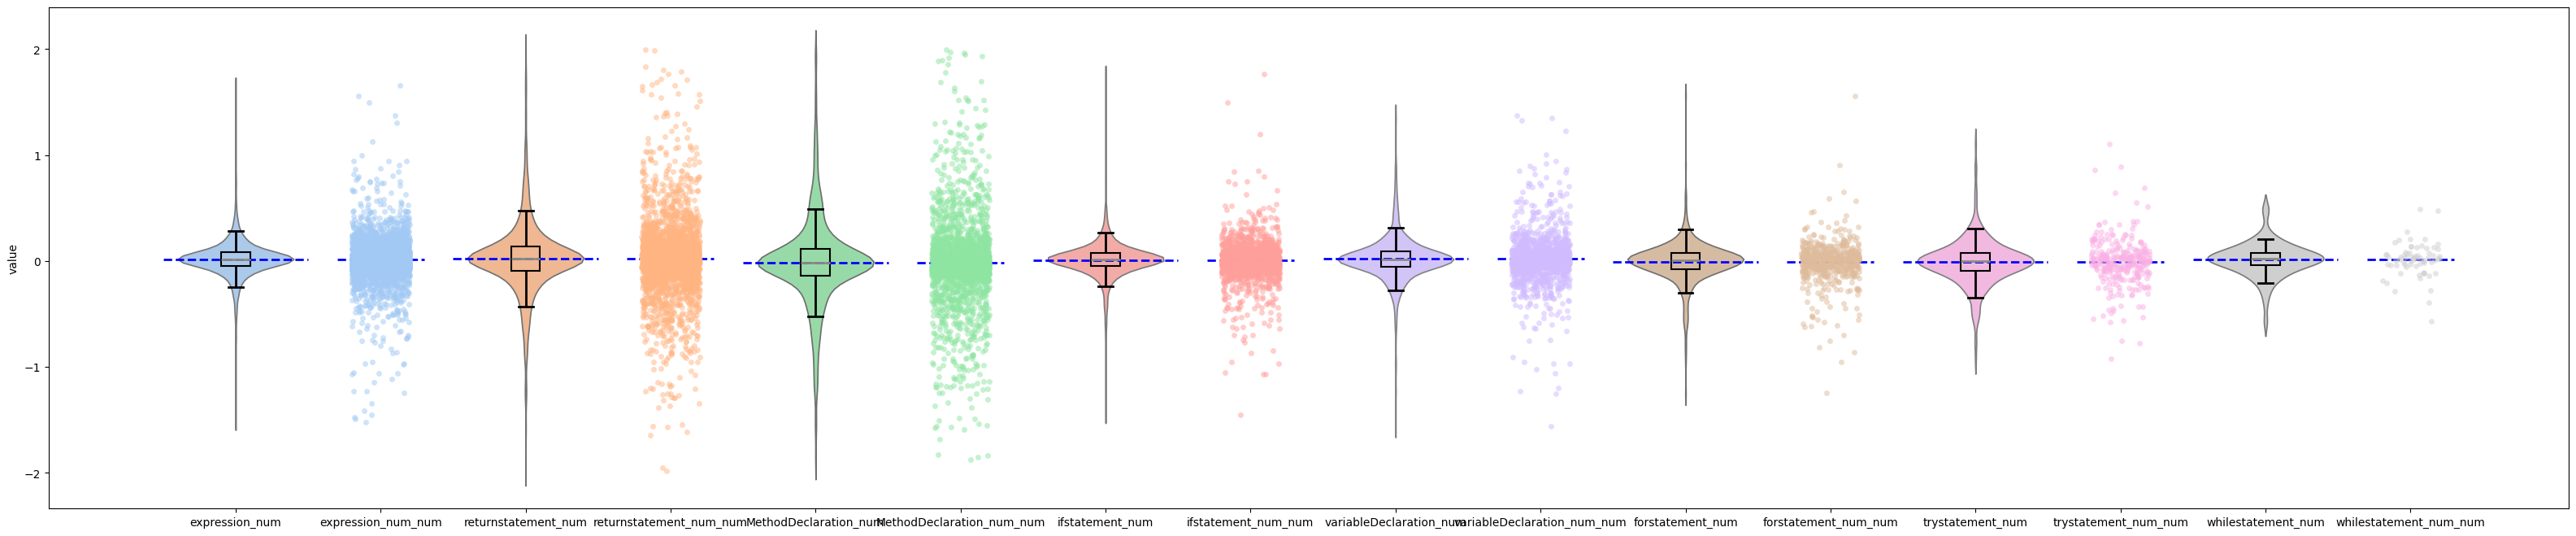

In [177]:
get_paper_picture(all_colunm_df_true)

In [178]:
all_colunm_df_true_abs = all_colunm_df_true.abs()
all_colunm_df_true_abs.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.191197             0.026822               0.013571   
1        0.048397             0.131420               0.412345   
2        0.034493             0.166484               0.211686   
3        0.050494             0.035449               0.023537   
4        0.023919             0.232338               0.060836   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         0.224068                 0.191197          0.131420   
1         0.267434                 0.048397          0.222676   
2         0.034493                 0.266712          0.007340   
3         0.136808                 0.166484          0.007644   
4         0.031834                 0.050494          0.140988   

   trystatement_num  whilestatement_num  
0          0.087215            0.135945  
1          0.005061            0.487758  
2          0.145905            0.199363  
3          0.041888            0.011297  
4          0.003133            0.038573

均值 : 
expression_num             0.114826
returnstatement_num        0.217211
MethodDeclaration_num      0.267288
ifstatement_num            0.107835
variableDeclaration_num    0.137352
forstatement_num           0.121815
trystatement_num           0.145207
whilestatement_num         0.108463
dtype: float64

从大到小排序后的均值 : 
MethodDeclaration_num      0.267288
returnstatement_num        0.217211
trystatement_num           0.145207
variableDeclaration_num    0.137352
forstatement_num           0.121815
expression_num             0.114826
whilestatement_num         0.108463
ifstatement_num            0.107835
dtype: float64


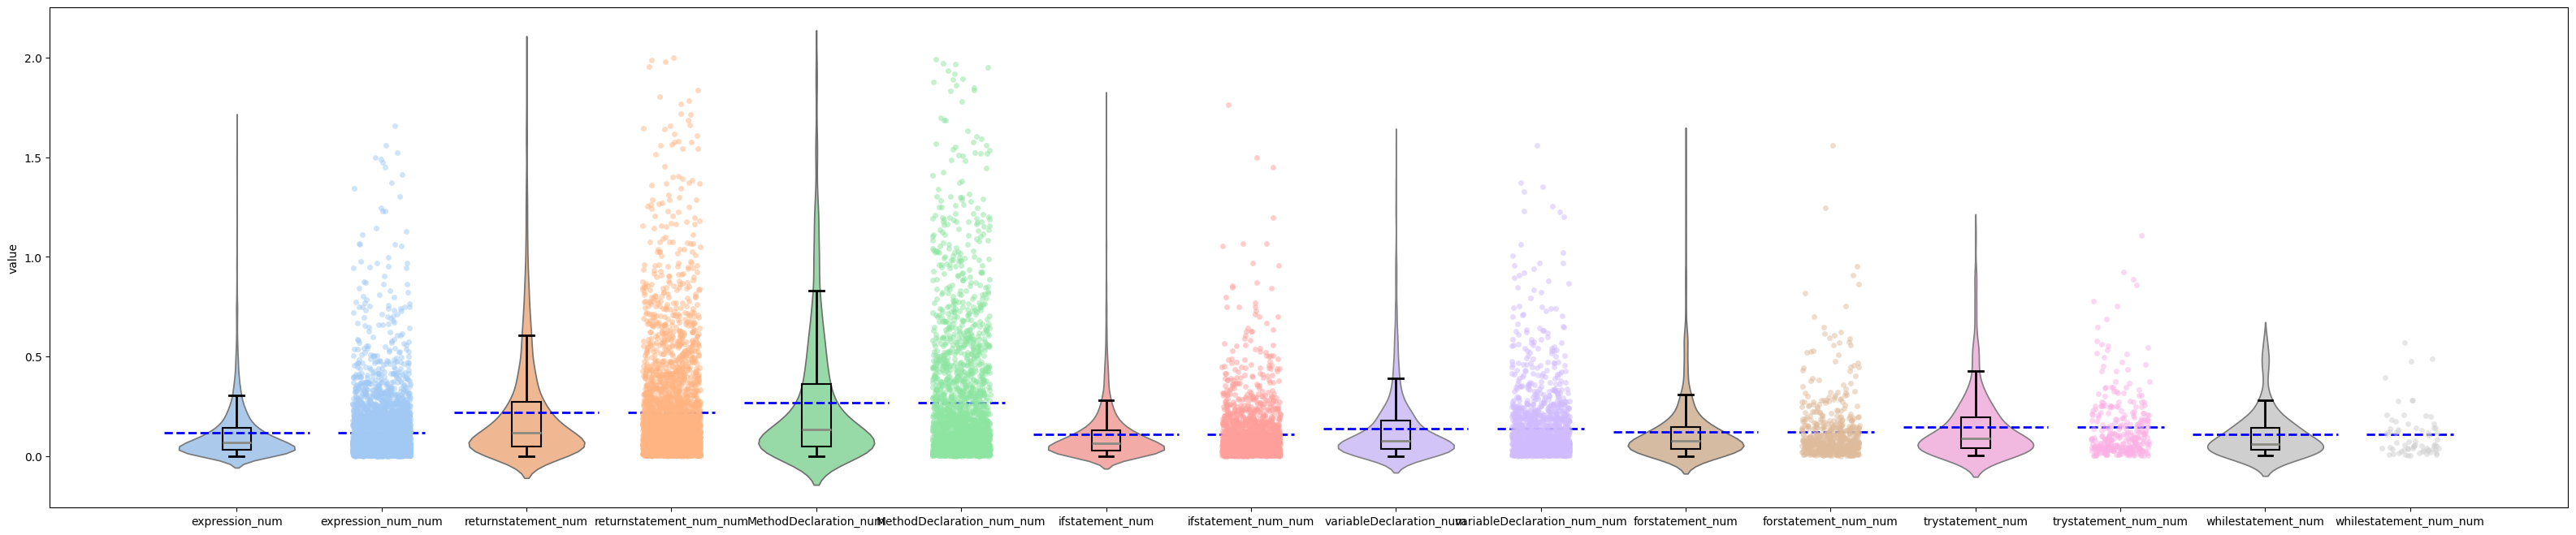

In [179]:
get_paper_picture(all_colunm_df_true_abs)

使用标准化方法，对全体数值进行标准化，结果与原本一致

In [180]:
# 使用 Z-score 标准化
from sklearn.preprocessing import StandardScaler

attribution_true_Z_score = attribution_true_copy1.copy()
scaler = StandardScaler()
attribution_true_Z_score['value'] = scaler.fit_transform(attribution_true_Z_score[['value']])

In [181]:
attribution_true_Z_score_all_column = get_all_colunm_df(attribution_true_Z_score)
attribution_true_Z_score_all_column.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.634588            -0.132249               0.009824   
1        0.132319             0.424335               1.412433   
2        0.083415             0.547665               0.706654   
3       -0.215511             0.086777               0.044880   
4        0.046224             0.779295              -0.251885   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         0.750206                 0.634588          0.424335   
1         0.902737                 0.132319          0.745308   
2         0.083415                 0.900196         -0.063725   
3         0.443288                 0.547665         -0.011022   
4        -0.149879                -0.215511         -0.533805   

   trystatement_num  whilestatement_num  
0         -0.344670           -0.516068  
1         -0.020107            1.677683  
2          0.475282            0.663309  
3         -0.185240           -0.077644  
4         -0.048929            0.097766

均值 : 
expression_num             0.014747
returnstatement_num        0.046122
MethodDeclaration_num     -0.083759
ifstatement_num           -0.006776
variableDeclaration_num    0.039473
forstatement_num          -0.074887
trystatement_num          -0.079359
whilestatement_num         0.006544
dtype: float64

从大到小排序后的均值 : 
returnstatement_num        0.046122
variableDeclaration_num    0.039473
expression_num             0.014747
whilestatement_num         0.006544
ifstatement_num           -0.006776
forstatement_num          -0.074887
trystatement_num          -0.079359
MethodDeclaration_num     -0.083759
dtype: float64


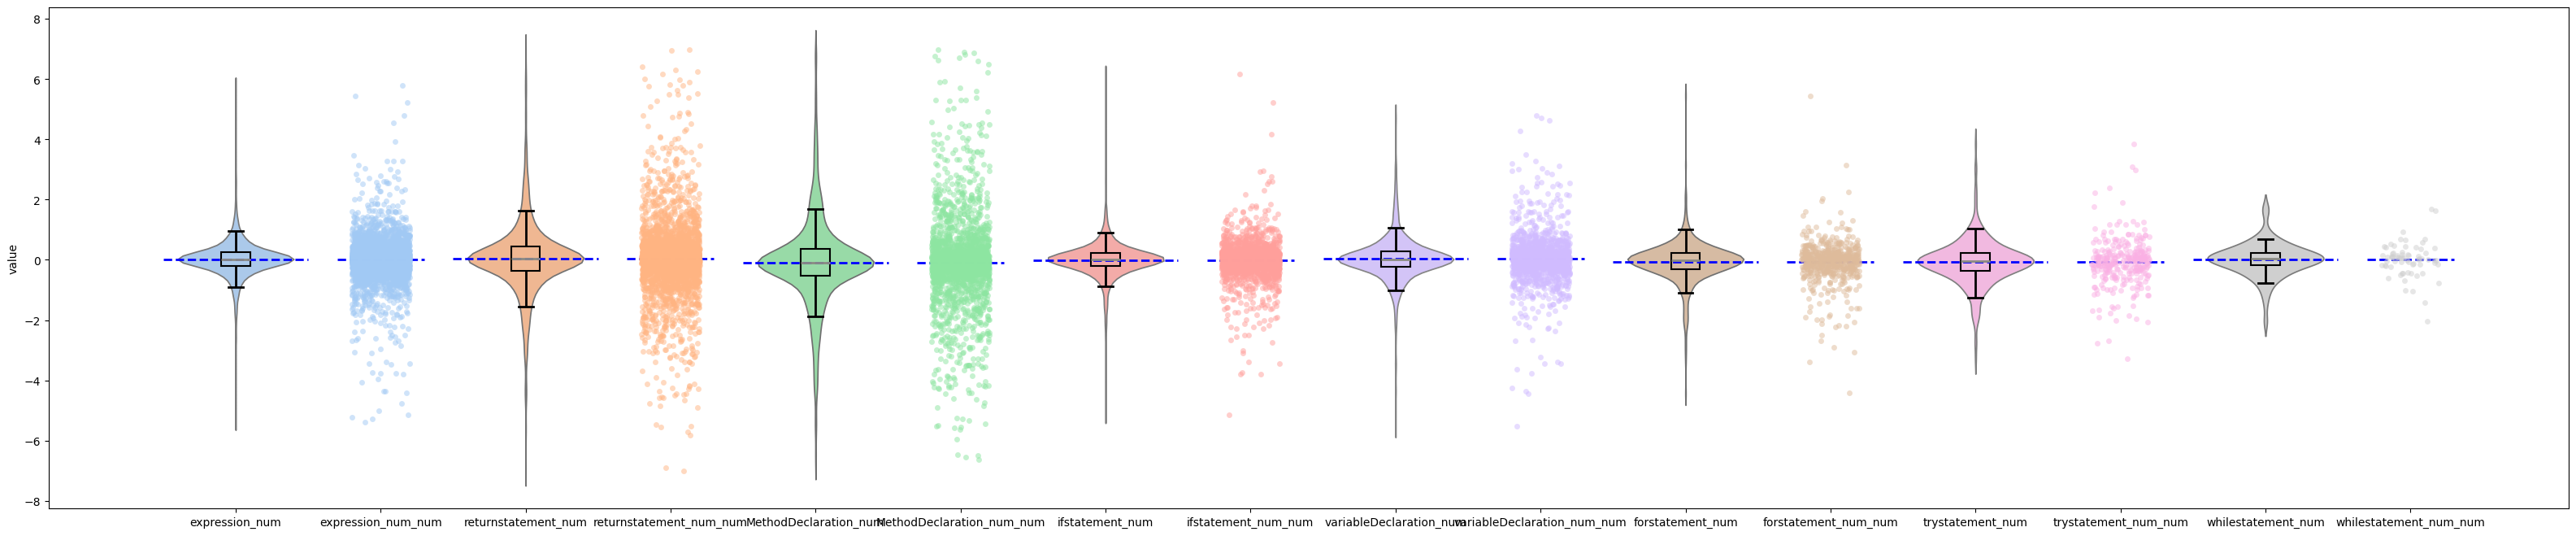

In [182]:
get_paper_picture(attribution_true_Z_score_all_column)

In [183]:
# 使用 Min-Max 标准化
from sklearn.preprocessing import MinMaxScaler

attribution_true_MinMax = attribution_true_copy1.copy()
scaler = MinMaxScaler(feature_range=(0, 10))
attribution_true_MinMax['value'] = scaler.fit_transform(attribution_true_MinMax[['value']])

In [184]:
attribution_true_MinMax_all_column = get_all_colunm_df(attribution_true_MinMax)
attribution_true_MinMax_all_column.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        5.458730             4.910649               5.012193   
1        5.099744             5.308456               6.014678   
2        5.064791             5.396603               5.510237   
3        4.851139             5.067194               5.037249   
4        5.038209             5.562156               4.825142   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         5.541365                 5.458730          5.308456   
1         5.650383                 5.099744          5.537864   
2         5.064791                 5.648567          4.959626   
3         5.322002                 5.396603          4.997294   
4         4.898049                 4.851139          4.623646   

   trystatement_num  whilestatement_num  
0          4.758826            4.636323  
1          4.990800            6.204259  
2          5.344869            5.479258  
3          4.872776            4.949677  
4          4.970201            5.075048

均值 : 
expression_num             5.015712
returnstatement_num        5.038137
MethodDeclaration_num      4.945306
ifstatement_num            5.000328
variableDeclaration_num    5.033384
forstatement_num           4.951648
trystatement_num           4.948452
whilestatement_num         5.009849
dtype: float64

从大到小排序后的均值 : 
returnstatement_num        5.038137
variableDeclaration_num    5.033384
expression_num             5.015712
whilestatement_num         5.009849
ifstatement_num            5.000328
forstatement_num           4.951648
trystatement_num           4.948452
MethodDeclaration_num      4.945306
dtype: float64


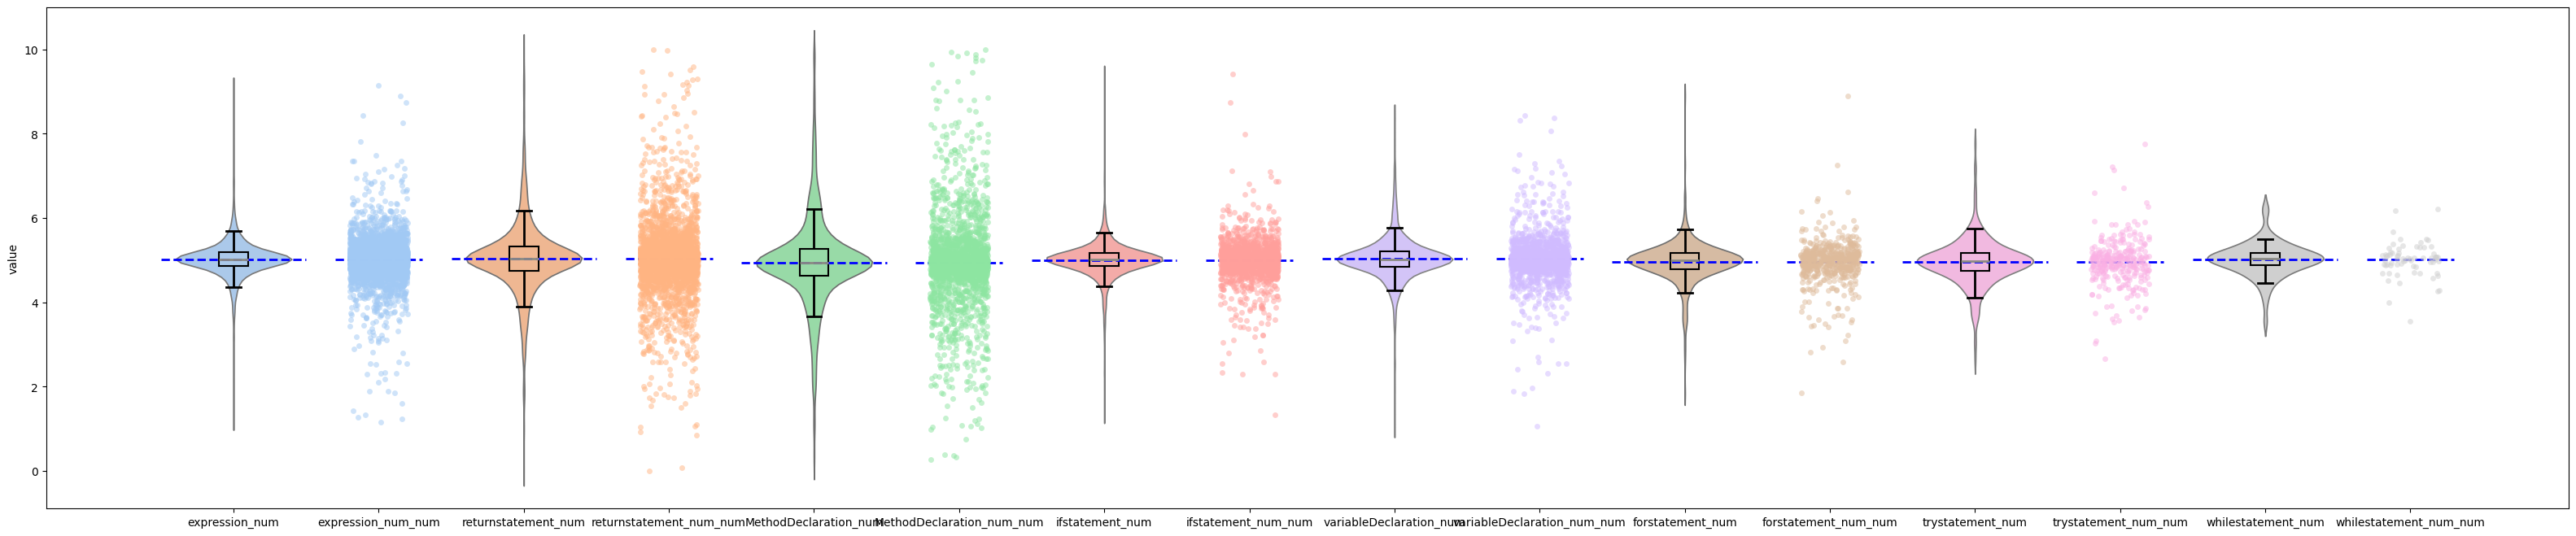

In [185]:
get_paper_picture(attribution_true_MinMax_all_column)

In [186]:
# 截尾处理

def Winsorization_outliers(df):
    for column_name in df.select_dtypes(include=[np.number]).columns:
        q1 = np.percentile(df[column_name].dropna(), 1)
        q3 = np.percentile(df[column_name].dropna(), 99)
        df[column_name] = df[column_name].apply(lambda x: np.nan if x < q1 or x > q3 else x)
        print(f'列 {column_name} 的第1个分位数: {q1}, 第99个分位数: {q3}')
    return df

all_colunm_df_true_for_Winsorization = all_colunm_df_true.copy()
all_colunm_df_true_Winsorization = Winsorization_outliers(all_colunm_df_true_for_Winsorization)

列 expression_num 的第1个分位数: -0.5860716002199999, 第99个分位数: 0.5487505199599985
列 returnstatement_num 的第1个分位数: -1.01977891334, 第99个分位数: 1.1591111950899986
列 MethodDeclaration_num 的第1个分位数: -1.2321658138, 第99个分位数: 1.3630895533199983
列 ifstatement_num 的第1个分位数: -0.58640354059, 第99个分位数: 0.4727679175199993
列 variableDeclaration_num 的第1个分位数: -0.62564465984, 第99个分位数: 0.7424306979000006
列 forstatement_num 的第1个分位数: -0.647687309, 第99个分位数: 0.4605896086600004
列 trystatement_num 的第1个分位数: -0.5746408190800001, 第99个分位数: 0.6837417618399999
列 whilestatement_num 的第1个分位数: -0.45112757323, 第99个分位数: 0.47850189625


均值 : 
expression_num             0.016281
returnstatement_num        0.022143
MethodDeclaration_num     -0.015351
ifstatement_num            0.009668
variableDeclaration_num    0.022281
forstatement_num          -0.009689
trystatement_num          -0.013809
whilestatement_num         0.014260
dtype: float64

从大到小排序后的均值 : 
variableDeclaration_num    0.022281
returnstatement_num        0.022143
expression_num             0.016281
whilestatement_num         0.014260
ifstatement_num            0.009668
forstatement_num          -0.009689
trystatement_num          -0.013809
MethodDeclaration_num     -0.015351
dtype: float64


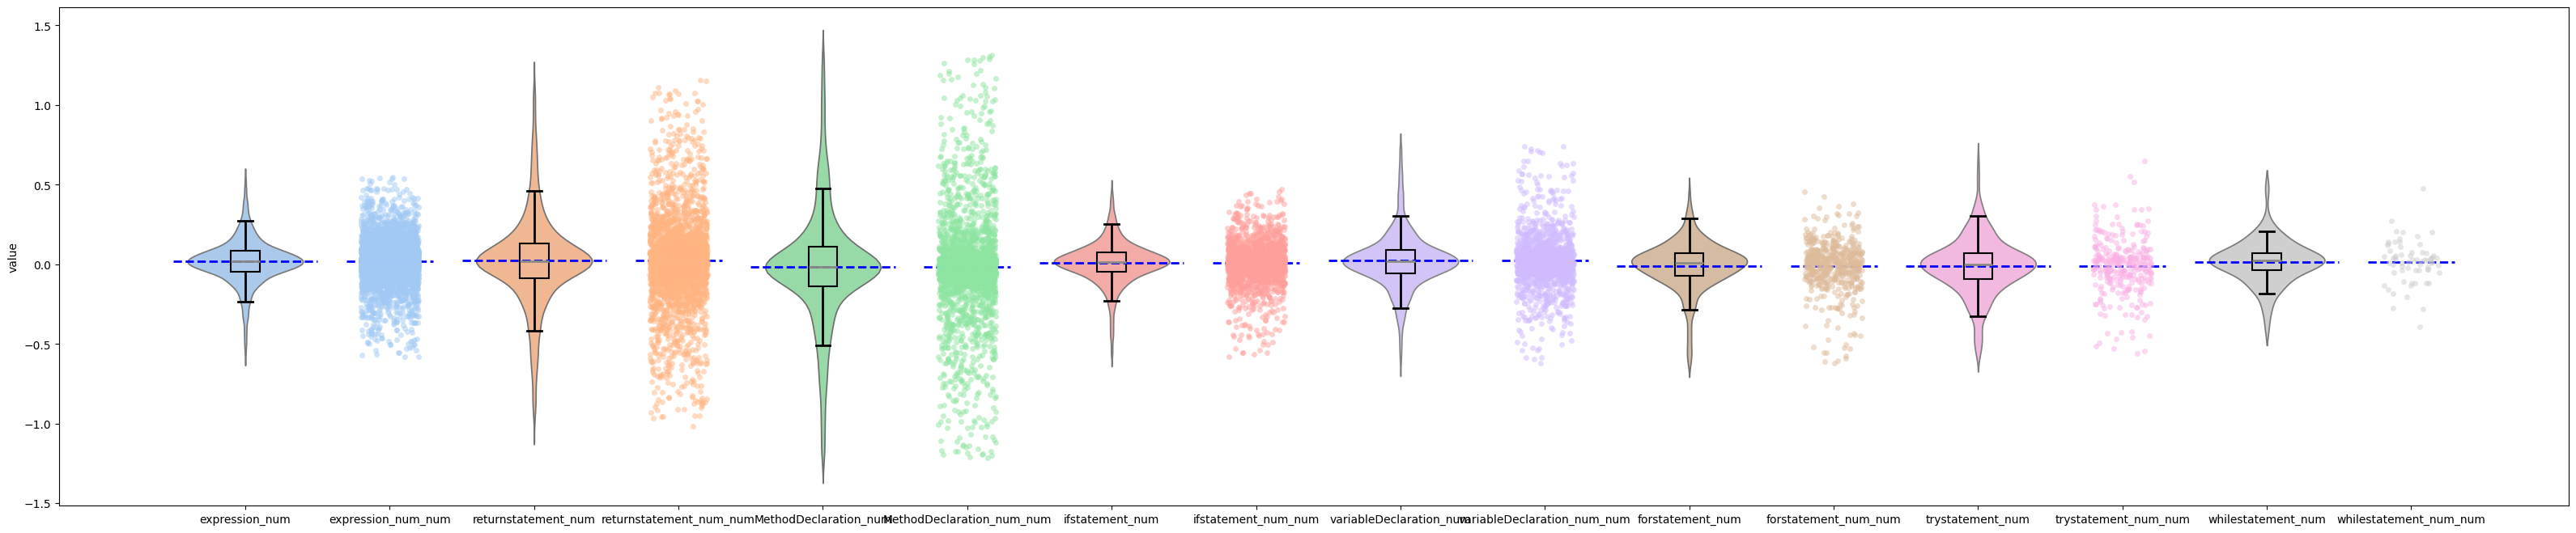

In [187]:
get_paper_picture(all_colunm_df_true_Winsorization)

In [188]:
all_colunm_df_Winsorization_true_abs = all_colunm_df_true_Winsorization.abs()
all_colunm_df_Winsorization_true_abs.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.191197             0.026822               0.013571   
1        0.048397             0.131420               0.412345   
2        0.034493             0.166484               0.211686   
3        0.050494             0.035449               0.023537   
4        0.023919             0.232338               0.060836   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         0.224068                 0.191197          0.131420   
1         0.267434                 0.048397          0.222676   
2         0.034493                 0.266712          0.007340   
3         0.136808                 0.166484          0.007644   
4         0.031834                 0.050494          0.140988   

   trystatement_num  whilestatement_num  
0          0.087215            0.135945  
1          0.005061                 NaN  
2          0.145905            0.199363  
3          0.041888            0.011297  
4          0.003133            0.038573

均值 : 
expression_num             0.098917
returnstatement_num        0.192064
MethodDeclaration_num      0.239134
ifstatement_num            0.093396
variableDeclaration_num    0.119680
forstatement_num           0.106293
trystatement_num           0.127133
whilestatement_num         0.095730
dtype: float64

从大到小排序后的均值 : 
MethodDeclaration_num      0.239134
returnstatement_num        0.192064
trystatement_num           0.127133
variableDeclaration_num    0.119680
forstatement_num           0.106293
expression_num             0.098917
whilestatement_num         0.095730
ifstatement_num            0.093396
dtype: float64


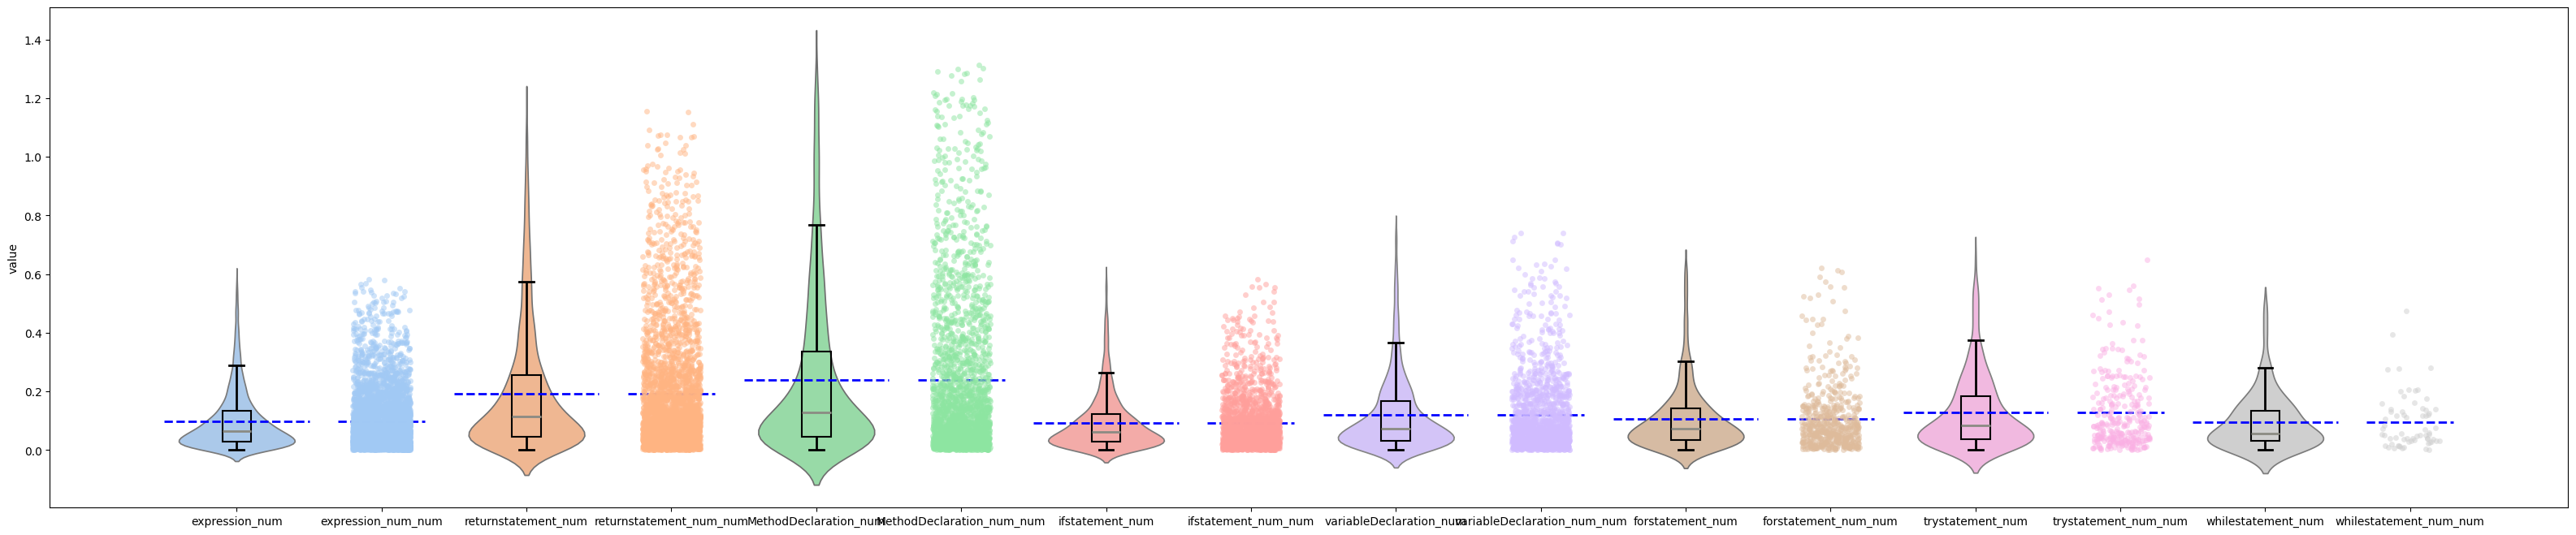

In [189]:
get_paper_picture(all_colunm_df_Winsorization_true_abs)

In [ ]:
# 截尾处理

def Winsorization_outliers(df):
    for column_name in df.select_dtypes(include=[np.number]).columns:
        q1 = np.percentile(df[column_name].dropna(), 5)
        q3 = np.percentile(df[column_name].dropna(), 95)
        df[column_name] = df[column_name].apply(lambda x: np.nan if x < q1 or x > q3 else x)
        print(f'列 {column_name} 的第1个分位数: {q1}, 第99个分位数: {q3}')
    return df

all_colunm_df_true_for_Winsorization_5 = all_colunm_df_true.copy()
all_colunm_df_true_Winsorization_5 = Winsorization_outliers(all_colunm_df_true_for_Winsorization_5)

get_paper_picture(all_colunm_df_true_Winsorization_5)

In [ ]:
all_colunm_df_Winsorization_true_5_abs = all_colunm_df_true_Winsorization_5.abs()
get_paper_picture(all_colunm_df_Winsorization_true_5_abs)

In [136]:
# 四分位距法
def iqr_outliers(df):
    for column_name in df.select_dtypes(include=[np.number]).columns:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3 - q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        df[column_name] = df[column_name].apply(lambda x: np.nan if x < Lower_tail or x > Upper_tail else x)
        print(f'下四分位数: {q1}, 上四分位数: {q3}, 最小值下界: {Lower_tail}, 最大值上界: {Upper_tail}')
    return df

all_colunm_df_true_for_iqr = all_colunm_df_true.copy()
all_colunm_df_true_iqr = iqr_outliers(all_colunm_df_true_for_iqr)

下四分位数-0.047109599,上四分位数0.08409236850000001,最小值下界-0.24391255025000003,最大值上界0.28089531975000004
下四分位数-0.0909452035,上四分位数0.13616640725,最小值下界-0.4316126196250001,最大值上界0.4768338233750001
下四分位数-0.141694007,上四分位数0.11260782800000001,最小值下界-0.5231467595000001,最大值上界0.49406058050000007
下四分位数-0.049094056500000004,上四分位数0.07909114075000001,最小值下界-0.24137185237500006,最大值上界0.27136893662500006
下四分位数-0.056690342,上四分位数0.09208866700000001,最小值下界-0.2798588555,最大值上界0.31525718050000007
下四分位数-0.0771169565,上四分位数0.0738741835,最小值下界-0.3036036665,最大值上界0.30036089349999995
下四分位数-0.094124529,上四分位数0.07584775700000002,最小值下界-0.34908295800000005,最大值上界0.33080618600000006
下四分位数-0.038585701,上四分位数0.07311296475000001,最小值下界-0.20613369962500003,最大值上界0.24066096337500004


expression_num             0.019723
returnstatement_num        0.021247
MethodDeclaration_num     -0.019013
ifstatement_num            0.015444
variableDeclaration_num    0.015560
forstatement_num           0.003854
trystatement_num          -0.010856
whilestatement_num         0.018774
dtype: float64


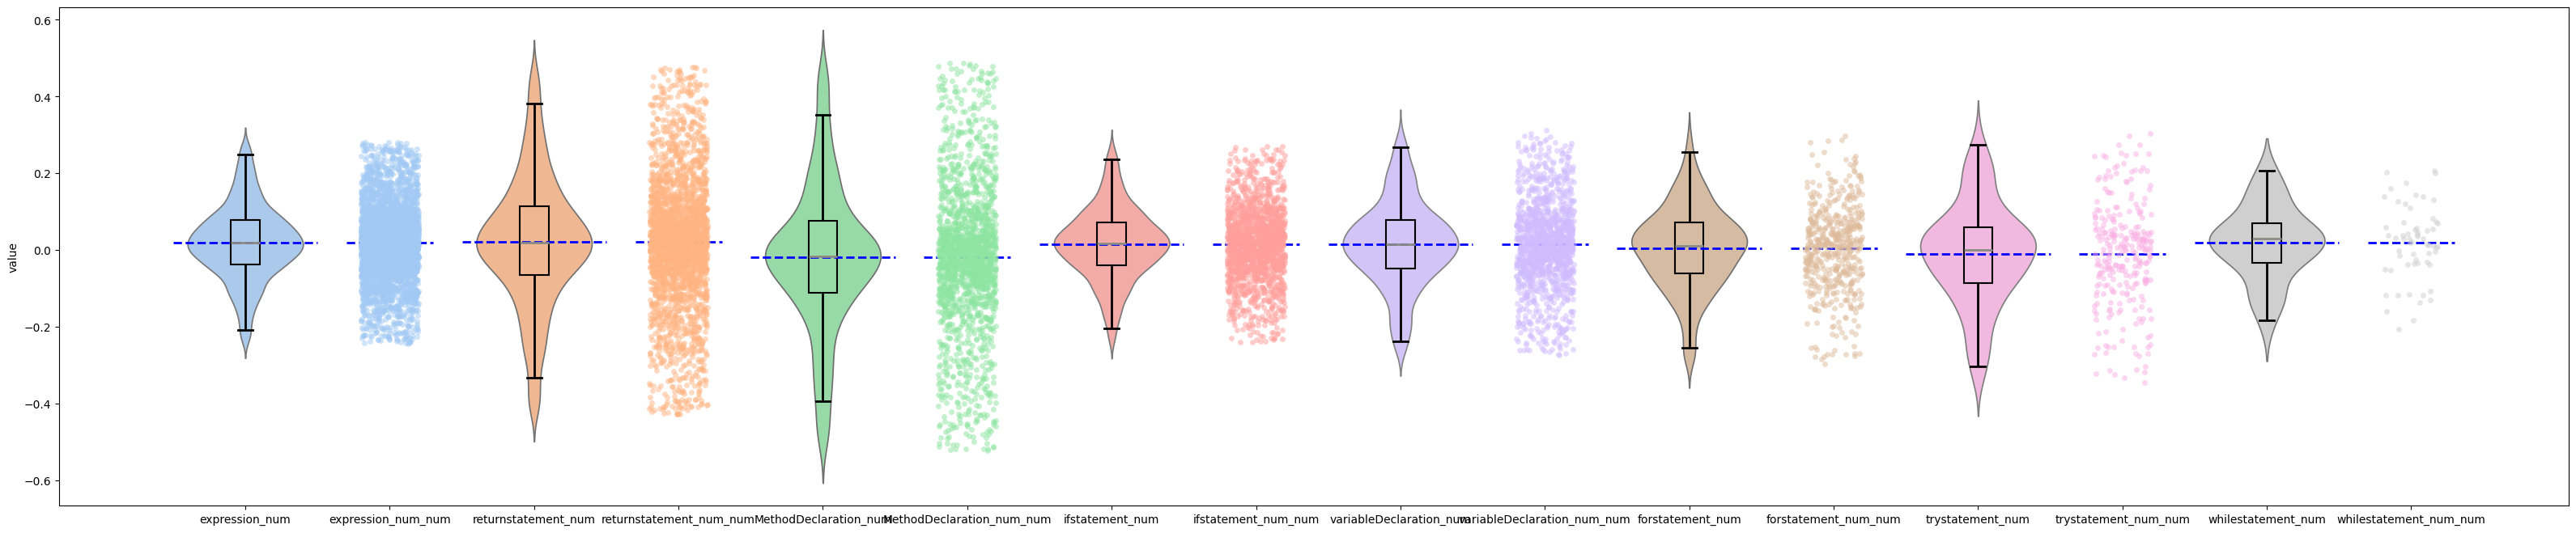

In [137]:
get_paper_picture(all_colunm_df_true_iqr)

In [138]:
all_colunm_df_iqr_true_abs = all_colunm_df_true_iqr.abs()
all_colunm_df_iqr_true_abs.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.191197             0.026822               0.013571   
1        0.048397             0.131420               0.412345   
2        0.034493             0.166484               0.211686   
3        0.050494             0.035449               0.023537   
4        0.023919             0.232338               0.060836   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         0.224068                 0.191197          0.131420   
1         0.267434                 0.048397          0.222676   
2         0.034493                 0.266712          0.007340   
3         0.136808                 0.166484          0.007644   
4         0.031834                 0.050494          0.140988   

   trystatement_num  whilestatement_num  
0          0.087215            0.135945  
1          0.005061                 NaN  
2          0.145905            0.199363  
3          0.041888            0.011297  
4          0.003133            0.038573

expression_num             0.077297
returnstatement_num        0.129411
MethodDeclaration_num      0.140984
ifstatement_num            0.073722
variableDeclaration_num    0.087433
forstatement_num           0.084424
trystatement_num           0.102507
whilestatement_num         0.075708
dtype: float64


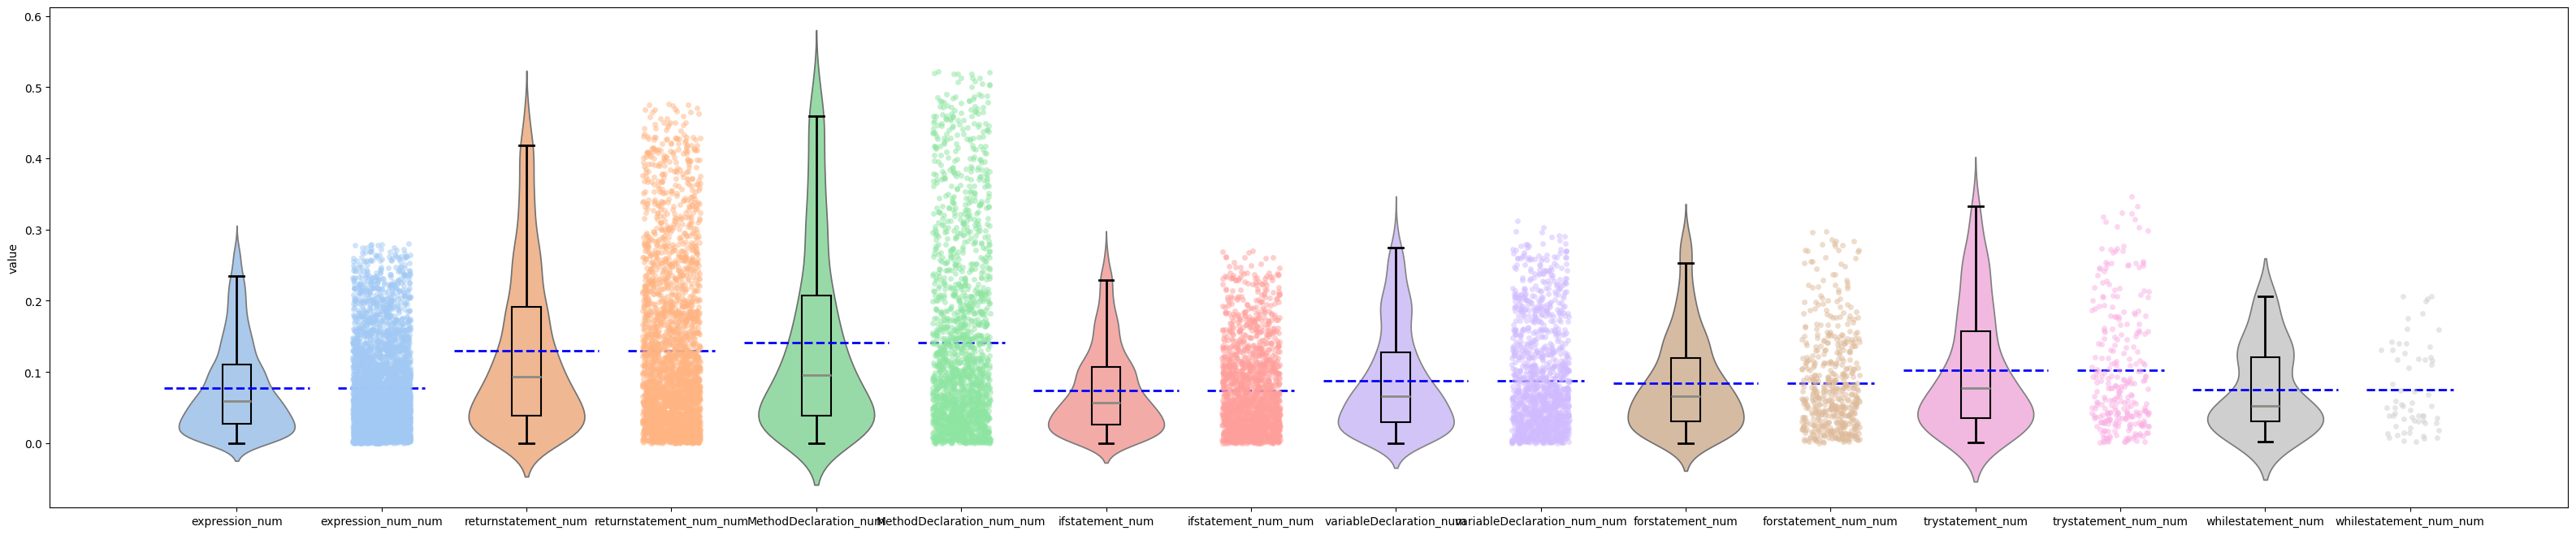

In [139]:
get_paper_picture(all_colunm_df_iqr_true_abs)

false

In [140]:
count_greater_than_1 = (linelevel_attribution_false['value'] > 1).sum().sum()
count_greater_than_2 = (linelevel_attribution_false['value'] > 2).sum().sum()
count_greater_than_4 = (linelevel_attribution_false['value'] > 4).sum().sum()
count_greater_than_5 = (linelevel_attribution_false['value'] > 5).sum().sum()
count_greater_than_1,count_greater_than_2,count_greater_than_4,count_greater_than_5

(69, 6, 0, 0)

In [141]:
count_less_than_1 = (linelevel_attribution_false['value'] < -1).sum().sum()
count_less_than_2 = (linelevel_attribution_false['value'] < -2).sum().sum()
count_less_than_4 = (linelevel_attribution_false['value'] < -4).sum().sum()
count_less_than_5 = (linelevel_attribution_false['value'] < -5).sum().sum()
count_less_than_1,count_less_than_2,count_less_than_4,count_less_than_5

(70, 11, 0, 0)

In [142]:
# 删除了 大于2小于-2 的值
attribution_false_copy1 = linelevel_attribution_false.copy()
attribution_false_copy1 = attribution_false_copy1[attribution_false_copy1['value'] <= 2]
attribution_false_copy1 = attribution_false_copy1[attribution_false_copy1['value'] > -2]
attribution_false_copy1 = attribution_false_copy1.reset_index(drop=True)

In [143]:
all_colunm_df_false = get_all_colunm_df(attribution_false_copy1)
all_colunm_df_false.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.193835             0.139482              -0.012378   
1       -0.052063            -0.202758              -0.131840   
2       -0.364585            -0.176777              -0.425897   
3       -0.091895             0.548456               1.048487   
4       -0.140216             0.240700               0.224376   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0        -0.052063                 0.193835         -0.015434   
1        -0.042921                 0.139482          0.031946   
2        -0.072009                -0.202758         -0.030566   
3        -0.146474                -0.364585         -0.074697   
4        -0.477257                -0.091895          0.166823   

   trystatement_num  whilestatement_num  
0         -0.015434            0.028533  
1         -0.052992           -0.025739  
2         -0.042921            0.130149  
3         -0.074167            0.895594  
4         -0.043912            0.237688

In [144]:
std_value = all_colunm_df_false.std()
std_value

expression_num             0.175716
returnstatement_num        0.386599
MethodDeclaration_num      0.457895
ifstatement_num            0.172235
variableDeclaration_num    0.251430
forstatement_num           0.171067
trystatement_num           0.176106
whilestatement_num         0.281131
dtype: float64

expression_num             0.006596
returnstatement_num        0.012646
MethodDeclaration_num     -0.013043
ifstatement_num            0.012324
variableDeclaration_num    0.012231
forstatement_num           0.015566
trystatement_num           0.017562
whilestatement_num         0.001811
dtype: float64


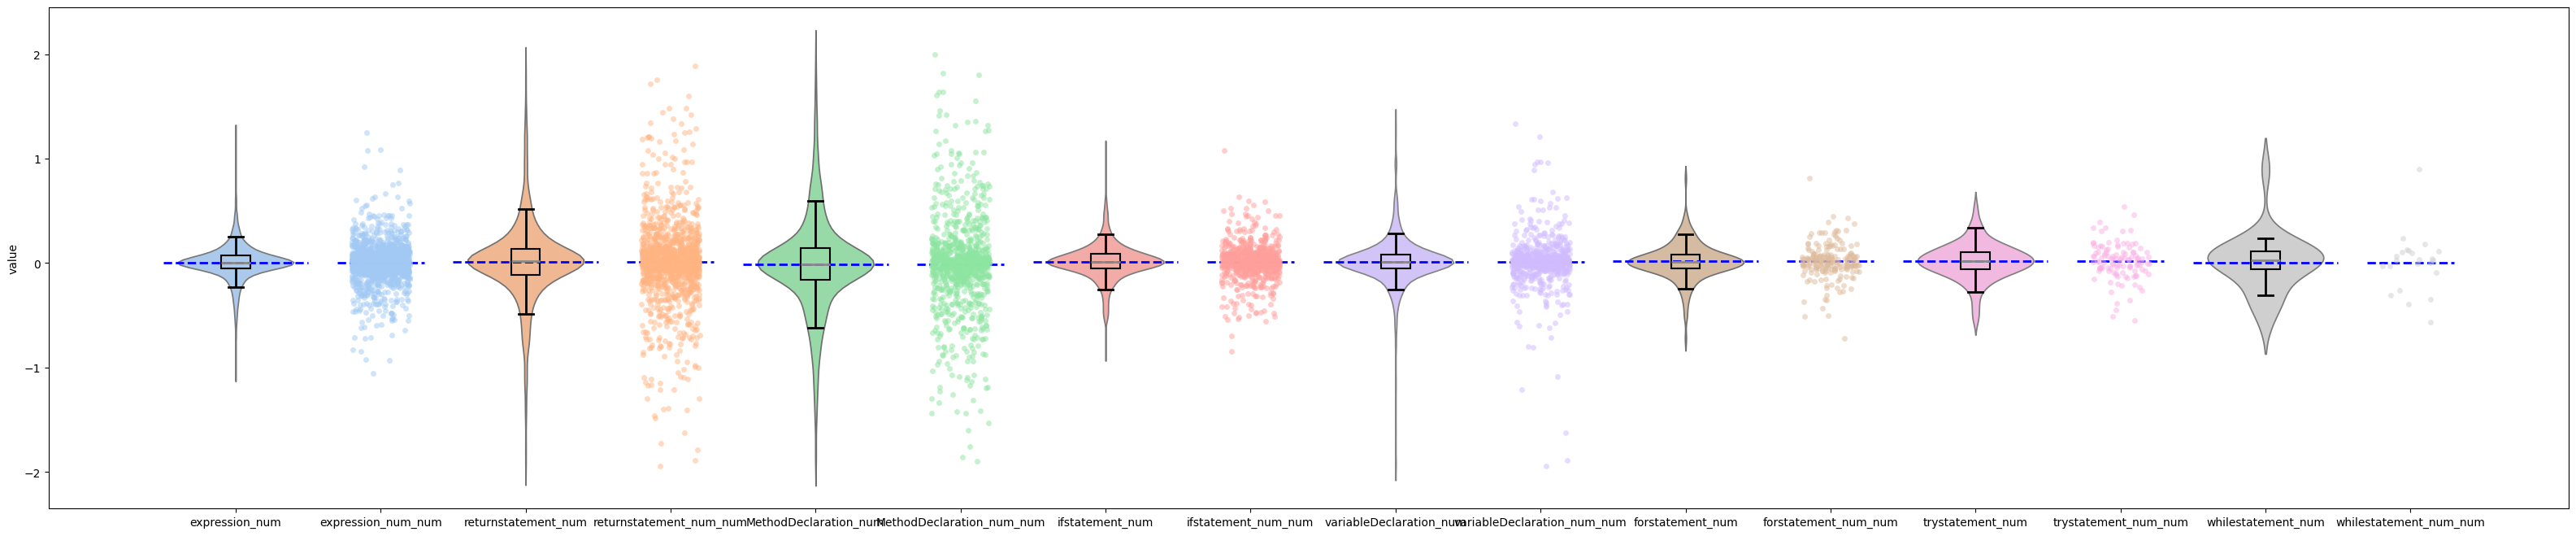

In [145]:
get_paper_picture(all_colunm_df_false)

绝对值均值

In [146]:
all_colunm_df_false_abs = all_colunm_df_false.abs()
all_colunm_df_false_abs.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.193835             0.139482               0.012378   
1        0.052063             0.202758               0.131840   
2        0.364585             0.176777               0.425897   
3        0.091895             0.548456               1.048487   
4        0.140216             0.240700               0.224376   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         0.052063                 0.193835          0.015434   
1         0.042921                 0.139482          0.031946   
2         0.072009                 0.202758          0.030566   
3         0.146474                 0.364585          0.074697   
4         0.477257                 0.091895          0.166823   

   trystatement_num  whilestatement_num  
0          0.015434            0.028533  
1          0.052992            0.025739  
2          0.042921            0.130149  
3          0.074167            0.895594  
4          0.043912            0.237688

expression_num             0.109668
returnstatement_num        0.240205
MethodDeclaration_num      0.296724
ifstatement_num            0.114660
variableDeclaration_num    0.138849
forstatement_num           0.115220
trystatement_num           0.127914
whilestatement_num         0.178806
dtype: float64


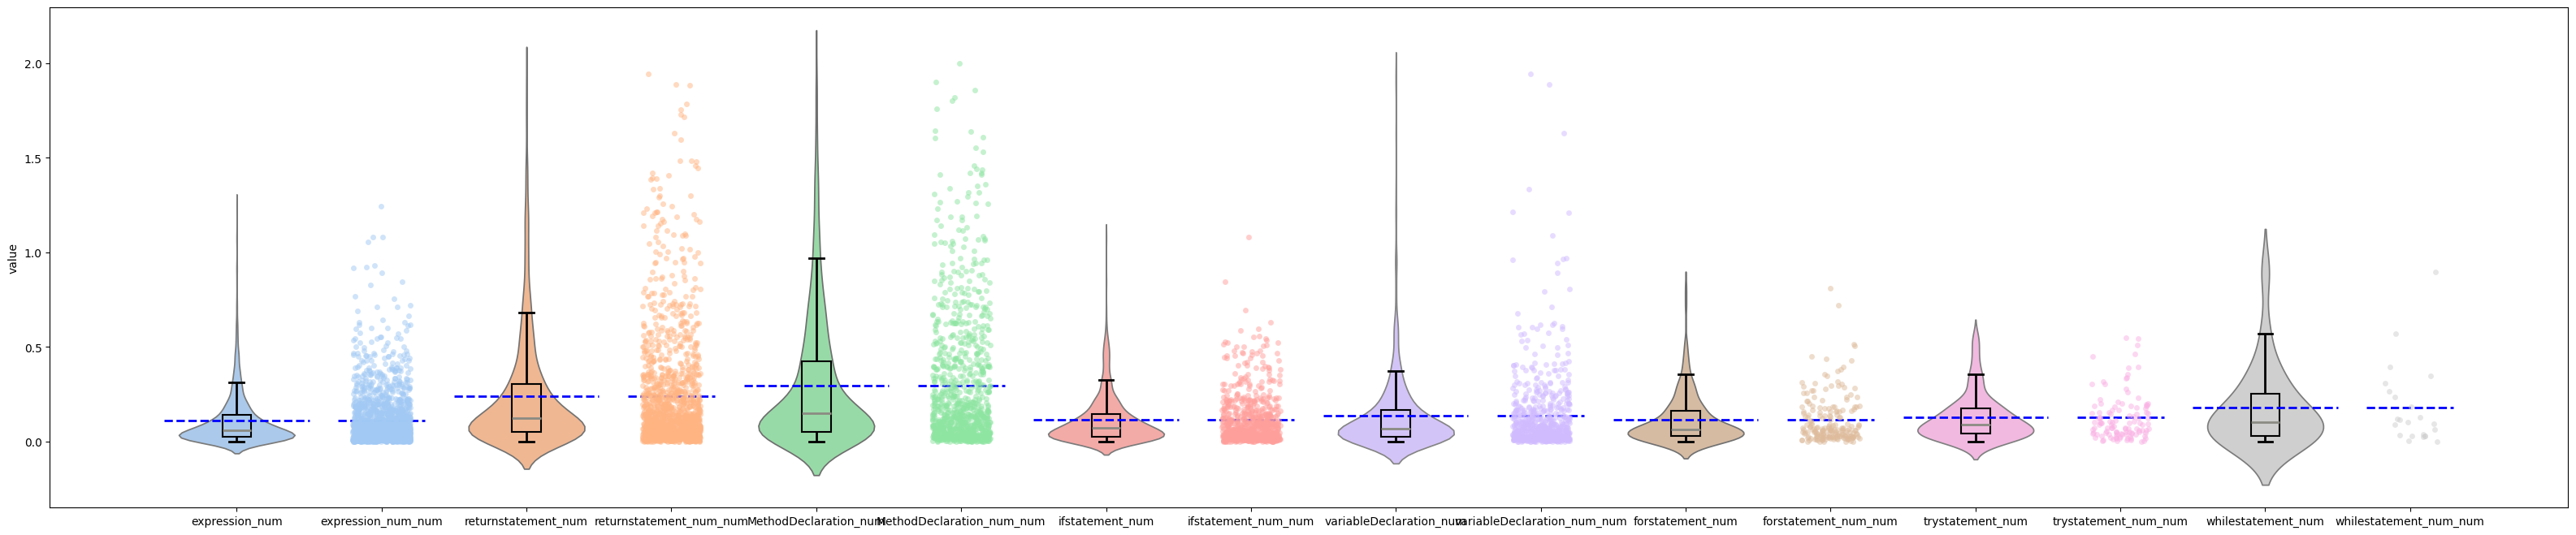

In [147]:
get_paper_picture(all_colunm_df_false_abs)

使用标准化方法，对全体数值进行标准化，结果与原本一致

In [148]:
# 使用 Z-score 标准化
from sklearn.preprocessing import StandardScaler

attribution_false_Z_score = attribution_false_copy1.copy()
scaler = StandardScaler()
attribution_false_Z_score['value'] = scaler.fit_transform(attribution_false_Z_score[['value']])

In [149]:
attribution_false_Z_score_all_column = get_all_colunm_df(attribution_false_Z_score)
attribution_false_Z_score_all_column.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.618848             0.439163              -0.062868   
1       -0.194061            -0.692243              -0.457797   
2       -1.227225            -0.606353              -1.429914   
3       -0.325742             1.791182               3.444228   
4       -0.485487             0.773779               0.719813   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0        -0.194061                 0.618848         -0.072970   
1        -0.163840                 0.439163          0.083663   
2        -0.260002                -0.692243         -0.122996   
3        -0.506173                -1.227225         -0.268889   
4        -1.599704                -0.325742          0.529550   

   trystatement_num  whilestatement_num  
0         -0.072970            0.072379  
1         -0.197132           -0.107039  
2         -0.163840            0.408310  
3         -0.267137            2.938781  
4         -0.167115            0.763821

expression_num            -0.000141
returnstatement_num        0.019858
MethodDeclaration_num     -0.065068
ifstatement_num            0.018792
variableDeclaration_num    0.018486
forstatement_num           0.029512
trystatement_num           0.036110
whilestatement_num        -0.015962
dtype: float64


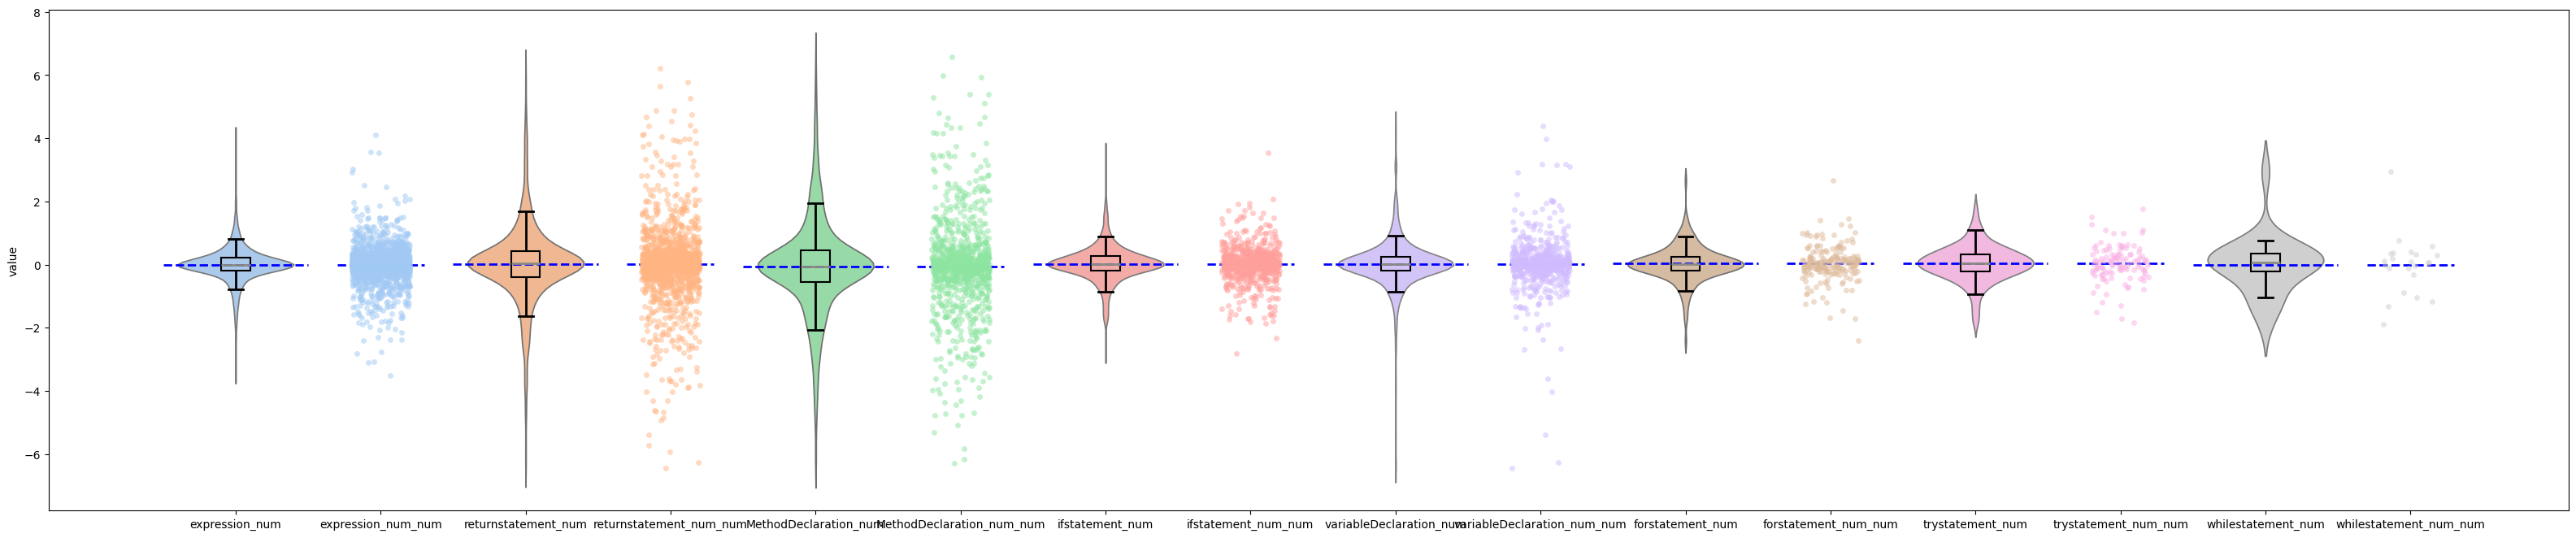

In [150]:
get_paper_picture(attribution_false_Z_score_all_column)

In [151]:
# 使用 Min-Max 标准化
from sklearn.preprocessing import MinMaxScaler

attribution_false_MinMax = attribution_false_copy1.copy()
scaler = MinMaxScaler(feature_range=(0, 10))
attribution_false_MinMax['value'] = scaler.fit_transform(attribution_false_MinMax[['value']])

In [152]:
attribution_false_MinMax_all_column = get_all_colunm_df(attribution_false_MinMax)
attribution_false_MinMax_all_column.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        5.422811             5.284843               4.899368   
1        4.798634             4.416114               4.596129   
2        4.005339             4.482064               3.849708   
3        4.697525             6.322965               7.592224   
4        4.574868             5.541771               5.500335   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         4.798634                 5.422811          4.891611   
1         4.821839                 5.284843          5.011879   
2         4.748002                 4.416114          4.853200   
3         4.558985                 4.005339          4.741179   
4         3.719338                 4.697525          5.354245   

   trystatement_num  whilestatement_num  
0          4.891611            5.003215  
1          4.796276            4.865453  
2          4.821839            5.261153  
3          4.742524            7.204126  
4          4.819324            5.534125

expression_num             4.947532
returnstatement_num        4.962887
MethodDeclaration_num      4.897679
ifstatement_num            4.962069
variableDeclaration_num    4.961834
forstatement_num           4.970300
trystatement_num           4.975366
whilestatement_num         4.935384
dtype: float64


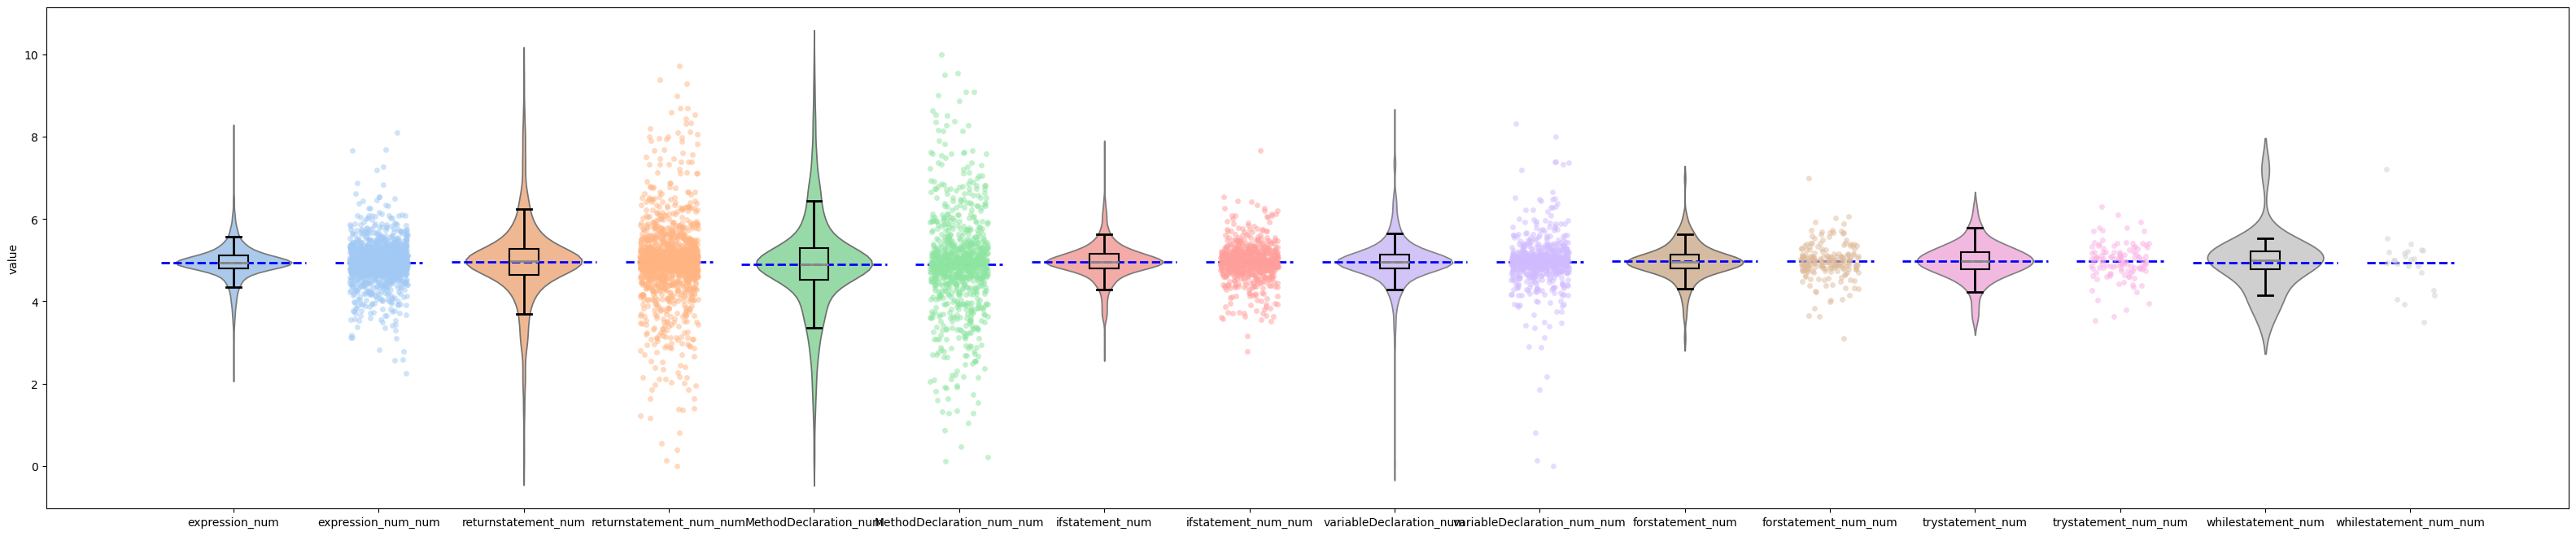

In [153]:
get_paper_picture(attribution_false_MinMax_all_column)

In [154]:
all_colunm_df_false_for_Winsorization = all_colunm_df_false.copy()
all_colunm_df_false_Winsorization = Winsorization_outliers(all_colunm_df_false_for_Winsorization)

列expression_num的第1个分位数-0.54368971056,第99个分位数0.4979536966799977
列returnstatement_num的第1个分位数-1.19344320385,第99个分位数1.2381278251100003
列MethodDeclaration_num的第1个分位数-1.32281627421,第99个分位数1.3850495730600014
列ifstatement_num的第1个分位数-0.50479301836,第99个分位数0.5031598272799997
列variableDeclaration_num的第1个分位数-0.75646301781,第99个分位数0.7923936659799942
列forstatement_num的第1个分位数-0.5059817396,第99个分位数0.42969988800000025
列trystatement_num的第1个分位数-0.50409352816,第99个分位数0.4541694656799997
列whilestatement_num的第1个分位数-0.53025835394,第99个分位数0.7508544748800008


expression_num             0.006435
returnstatement_num        0.013291
MethodDeclaration_num     -0.014021
ifstatement_num            0.012193
variableDeclaration_num    0.015795
forstatement_num           0.015750
trystatement_num           0.018717
whilestatement_num        -0.013586
dtype: float64


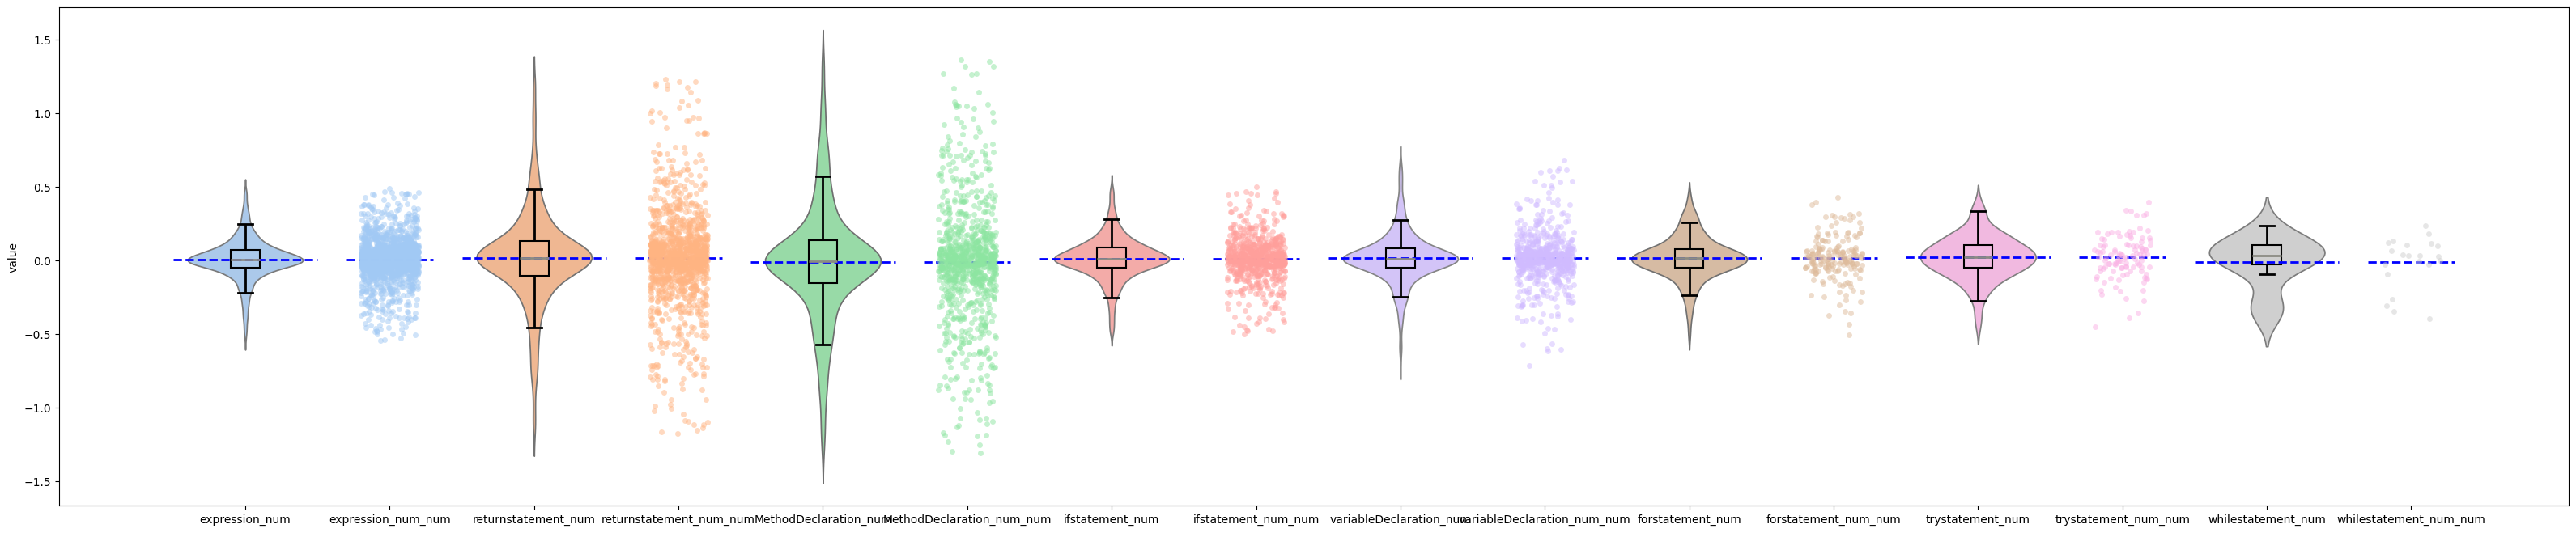

In [155]:
get_paper_picture(all_colunm_df_false_Winsorization)

In [156]:
all_colunm_df_Winsorization_false_abs = all_colunm_df_false_Winsorization.abs()
all_colunm_df_Winsorization_false_abs.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.193835             0.139482               0.012378   
1        0.052063             0.202758               0.131840   
2        0.364585             0.176777               0.425897   
3        0.091895             0.548456               1.048487   
4        0.140216             0.240700               0.224376   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         0.052063                 0.193835          0.015434   
1         0.042921                 0.139482          0.031946   
2         0.072009                 0.202758          0.030566   
3         0.146474                 0.364585          0.074697   
4         0.477257                 0.091895          0.166823   

   trystatement_num  whilestatement_num  
0          0.015434            0.028533  
1          0.052992            0.025739  
2          0.042921            0.130149  
3          0.074167                 NaN  
4          0.043912            0.237688

expression_num             0.097005
returnstatement_num        0.213740
MethodDeclaration_num      0.268769
ifstatement_num            0.103827
variableDeclaration_num    0.115667
forstatement_num           0.104637
trystatement_num           0.113644
whilestatement_num         0.126110
dtype: float64


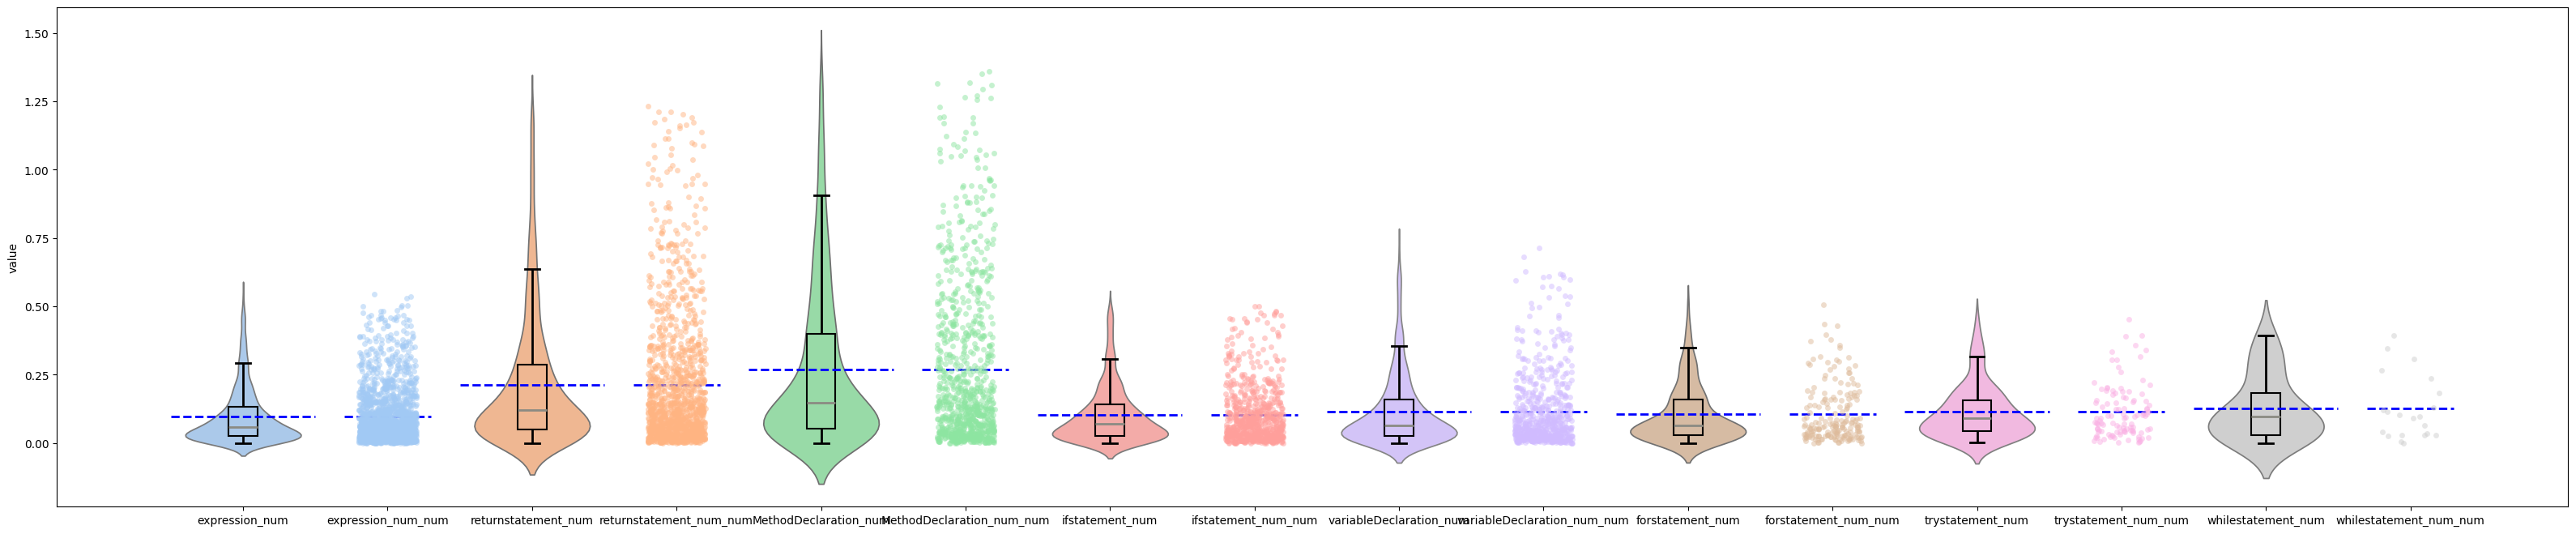

In [157]:
get_paper_picture(all_colunm_df_Winsorization_false_abs)

In [158]:
all_colunm_df_false_for_iqr = all_colunm_df_false.copy()
all_colunm_df_false_iqr = iqr_outliers(all_colunm_df_false_for_iqr)

下四分位数-0.048926179,上四分位数0.071927076,最小值下界-0.2302060615,最大值上界0.2532069585
下四分位数-0.113052232,上四分位数0.13915652925,最小值下界-0.491365373875,最大值上界0.517469671125
下四分位数-0.16379767175,上四分位数0.14069080575,最小值下界-0.620530388,最大值上界0.597423522
下四分位数-0.050416134,上四分位数0.08885790000000002,最小值下界-0.259327185,最大值上界0.297768951
下四分位数-0.05287278925,上四分位数0.08358321375000001,最小值下界-0.25755679375,最大值上界0.28826721825
下四分位数-0.05304345825,上四分位数0.07831115125,最小值下界-0.2500753725,最大值上界0.2753430655
下四分位数-0.056428278,上四分位数0.103169069,最小值下界-0.2958242985,最大值上界0.3425650895
下四分位数-0.0607881455,上四分位数0.1092668175,最小值下界-0.31587059,最大值上界0.364349262


expression_num             0.011169
returnstatement_num        0.019317
MethodDeclaration_num     -0.013245
ifstatement_num            0.015147
variableDeclaration_num    0.013879
forstatement_num           0.013278
trystatement_num           0.027084
whilestatement_num         0.023917
dtype: float64


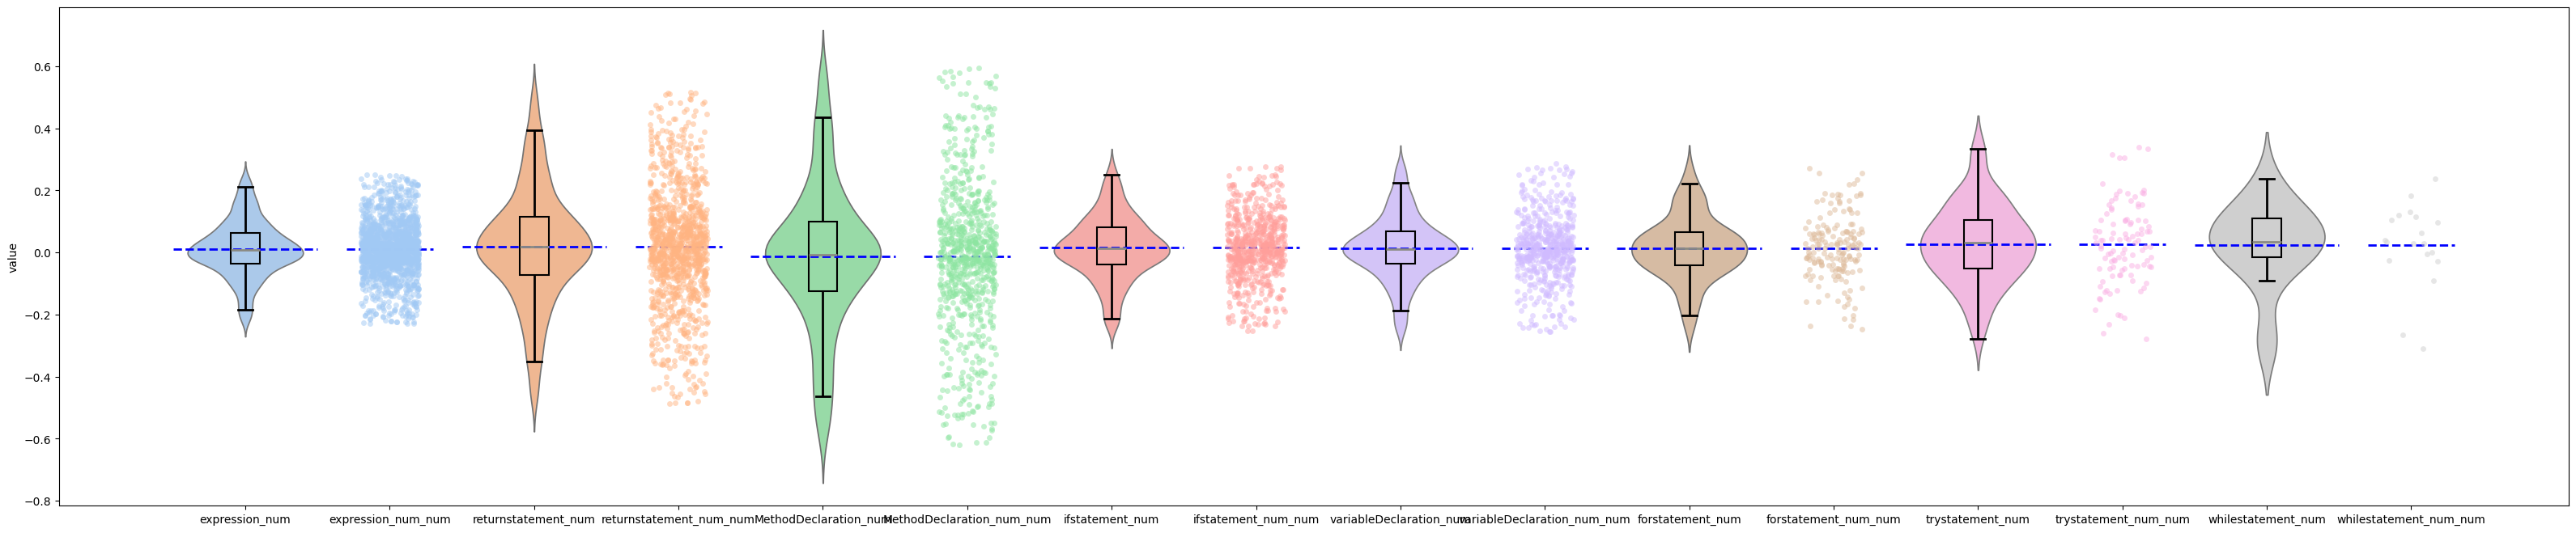

In [159]:
get_paper_picture(all_colunm_df_false_iqr)

In [160]:
all_colunm_df_iqr_false_abs = all_colunm_df_false_iqr.abs()
all_colunm_df_iqr_false_abs.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.193835             0.139482               0.012378   
1        0.052063             0.202758               0.131840   
2             NaN             0.176777               0.425897   
3        0.091895                  NaN                    NaN   
4        0.140216             0.240700               0.224376   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         0.052063                 0.193835          0.015434   
1         0.042921                 0.139482          0.031946   
2         0.072009                 0.202758          0.030566   
3         0.146474                      NaN          0.074697   
4              NaN                 0.091895          0.166823   

   trystatement_num  whilestatement_num  
0          0.015434            0.028533  
1          0.052992            0.025739  
2          0.042921            0.130149  
3          0.074167                 NaN  
4          0.043912            0.237688

expression_num             0.069286
returnstatement_num        0.139122
MethodDeclaration_num      0.171189
ifstatement_num            0.079798
variableDeclaration_num    0.077909
forstatement_num           0.078707
trystatement_num           0.102803
whilestatement_num         0.100451
dtype: float64


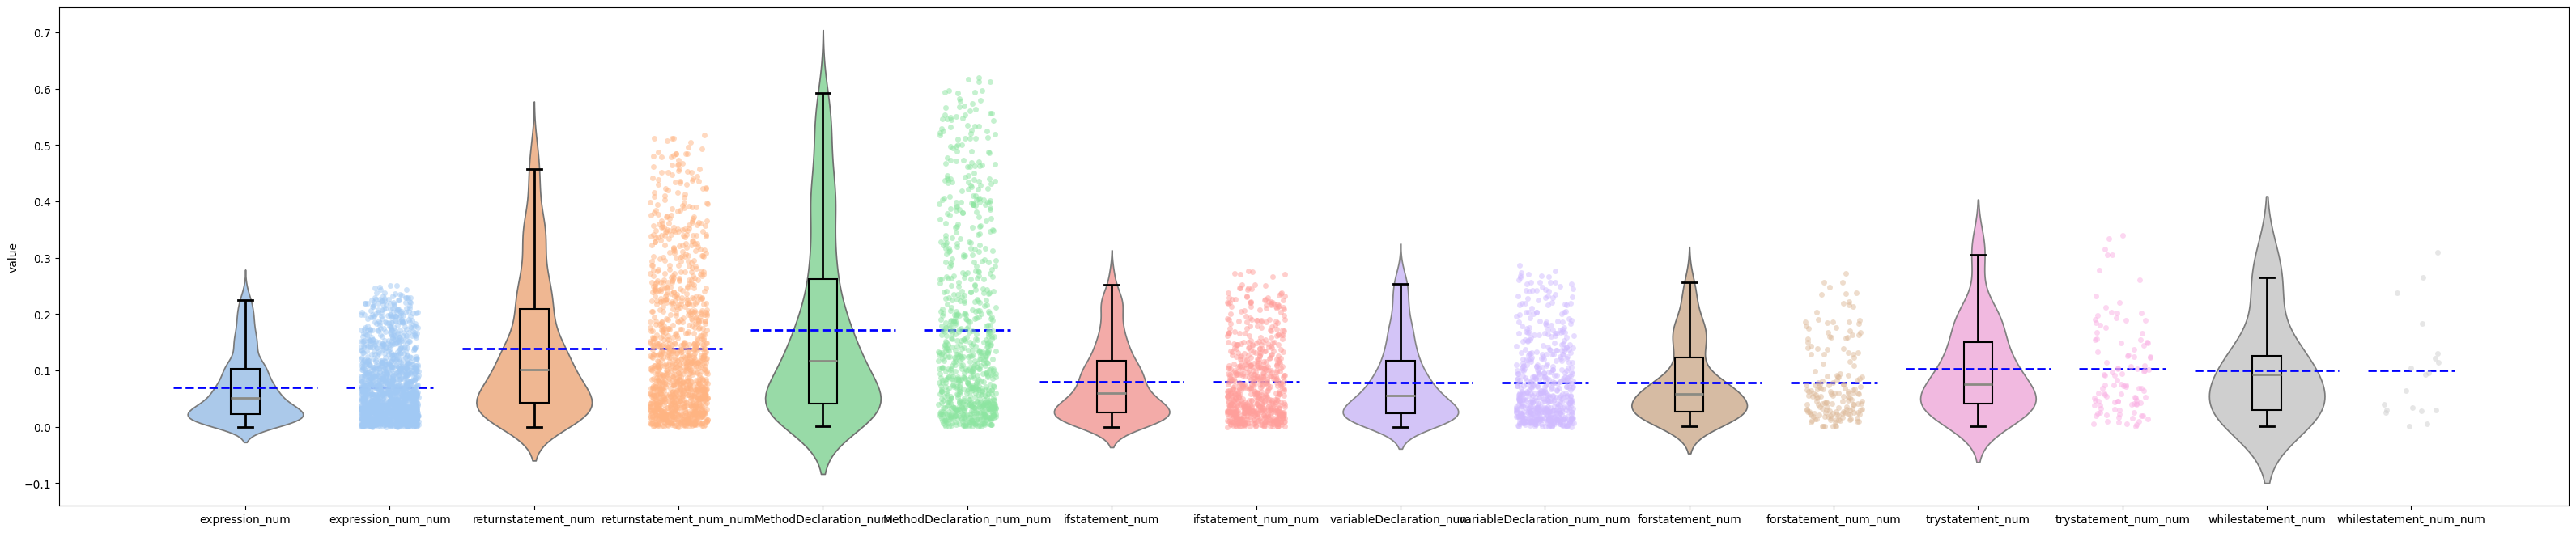

In [161]:
get_paper_picture(all_colunm_df_iqr_false_abs)